# Proyecto Final
# "Análisis de opiniones de clientes mediante NLP: identificación de tendencias y sentimientos"
# Data Scientist 3
#Héctor leonardo Ferreyra
#Abstracto

###Motivación:
En la actualidad, los negocios dependen fuertemente de la percepción que sus clientes tienen sobre sus productos y servicios. Lo que empuja el anaálisis de las opiniones y reseñas que permiten identificar fortalezas, debilidades y áreas de mejora, generando información valiosa para la toma de decisiones, esto es, la evaluación de satisfacción del cliente. Además, el aprendizaje automático y el procesamiento de lenguaje natural (NLP) ofrecen herramientas potentes para extraer insights de grandes volúmenes de texto de manera automática y escalable.

##Audiencia:
El presente trabajo está dirigido a la dirección de la empresa Directorio Refrigeración SA, que busca comprender mejor la experiencia del cliente y cuantificar el sentimiento general hacia la misma.

##Contexto Comercial y Analítico

El proyecto se centra en la satisfacción del cliente hacia la empresa Directorio Refrigeración SA, con reseñas en Google, cuyos clientes expresan opiniones sobre atención, precios, calidad del servicio y otros aspectos. Analíticamente, el proyecto combina técnicas de NLP para preprocesar, analizar y visualizar opiniones, con un enfoque exploratorio de sentimientos.

El análisis incluye:

Limpieza y tokenización de texto.

Identificación de palabras y n-grams más frecuentes.

Clasificación de sentimientos(positivo, negativo, neutral).

Visualización de patrones mediante gráficos y WordCloud.

Este contexto permite transformar datos no estructurados en información accionable para decisiones comerciales.

##Hipótesis a Resolver

¿Cuáles son los aspectos más mencionados por los clientes en sus opiniones?

¿Predomina un sentimiento positivo, negativo o neutral hacia el comercio?

¿Se pueden identificar patrones de lenguaje que indiquen oportunidades de mejora (por ejemplo, precios o atención)?

Hipótesis: La mayoría de opiniones destacan la atención y los precios como los factores más relevantes, y la percepción general es positiva.

#Objetivo

##Objetivo General:
Analizar las opiniones de los clientes de Directorio Refrigeraciín utilizando técnicas de NLP y visualización, para identificar los tópicos más mencionados y el sentimiento general de los clientes.

##Objetivos Específicos:

Preprocesar y limpiar el texto de opiniones.

Extraer palabras clave y combinaciones frecuentes de palabras (n-grams).

Clasificar el sentimiento de cada opinión en positivo, negativo o neutral.

Visualizar los resultados mediante gráficos y WordCloud para facilitar la interpretación.

Generar insights prácticos que puedan guiar decisiones comerciales.

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag, FreqDist


# Cargo desde CSV
df = pd.read_csv("opiniones.csv")

# Verifico que se cargo bien
print(df.head())


                                             opinion
0  "Excelente atención, muy atentos con los clien...
1  "Muy bueno, tienen de todo y los precios son b...
2  "Excelente la atención y el asesoramiento tant...
3                    "Excelente atención y precios."
4  "Muy buena atención, me consiguieron un repues...


##Para lograr el dataset, copie y pegué los comentarios de Google en un excel, transformandolo en un archivo CSV.

#Luego, realizo PROCESAMIENTO DE DATOS

In [101]:
import re

# Genero las funcion de limpieza
def limpiar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'[^a-záéíóúñü\s]', '', texto)  # Quitar puntuación
    return texto

# Aplico la limpieza
df['opinion_limpia'] = df['opinion'].apply(limpiar_texto)

# Hago tokenización simple usando split
df['tokens'] = df['opinion_limpia'].apply(lambda x: x.split())

# Muestro resultado
df.head()


,opinion,opinion_limpia,tokens
0,"""Excelente atención, muy atentos con los clien...",excelente atención muy atentos con los cliente...,"[excelente, atención, muy, atentos, con, los, ..."
1,"""Muy bueno, tienen de todo y los precios son b...",muy bueno tienen de todo y los precios son bue...,"[muy, bueno, tienen, de, todo, y, los, precios..."
2,"""Excelente la atención y el asesoramiento tant...",excelente la atención y el asesoramiento tanto...,"[excelente, la, atención, y, el, asesoramiento..."
3,"""Excelente atención y precios.""",excelente atención y precios,"[excelente, atención, y, precios]"
4,"""Muy buena atención, me consiguieron un repues...",muy buena atención me consiguieron un repuesto...,"[muy, buena, atención, me, consiguieron, un, r..."


De esta manera estandarizo la información y la estructuro para seguir analalizando

# ANALISIS EXPLORATORIO

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


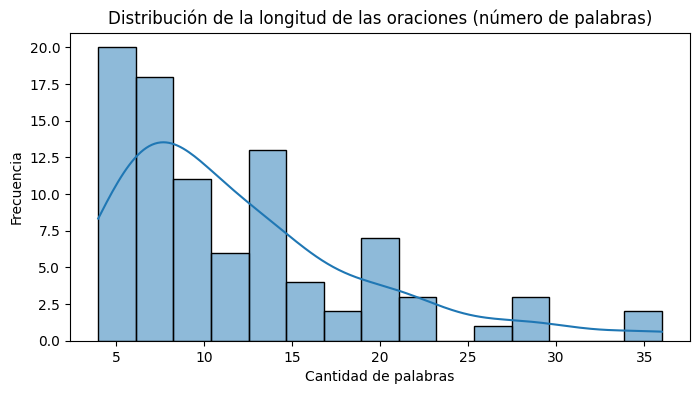

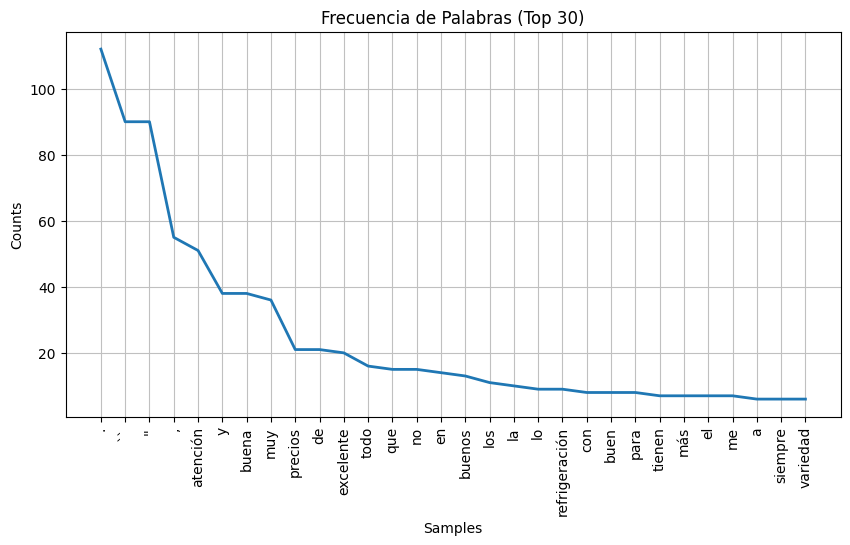

Ejemplo de POS tagging: [('``', '``'), ('Excelente', 'NNP'), ('atención', 'NN'), (',', ','), ('muy', 'FW'), ('atentos', 'NNS'), ('con', 'VBP'), ('los', 'JJ'), ('clientes', 'NNS'), ('y', 'VBP'), ('los', 'JJ'), ('precios', 'NNS'), ('súper', 'JJ'), ('accesibles', 'NNS'), ('.', '.'), ('¡Super', 'CC'), ('recomendable', 'JJ'), ('!', '.'), ("''", "''"), ('``', '``')]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


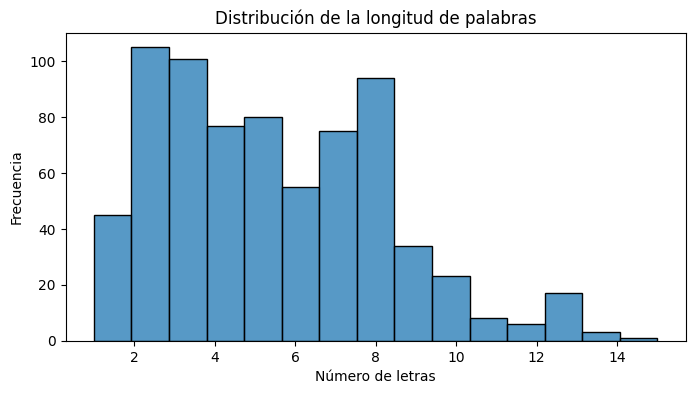

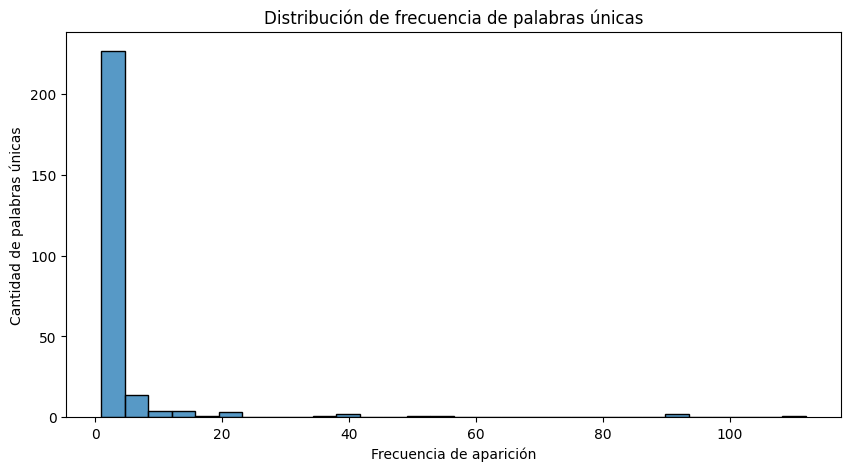

In [102]:

# DescargO recursos de NLTK
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

# 1. Longitud de las oraciones (en cantidad de palabras)
df["long_oracion"] = df["opinion"].apply(lambda x: len(word_tokenize(str(x))))
plt.figure(figsize=(8,4))
sns.histplot(df["long_oracion"], bins=15, kde=True)
plt.title("Distribución de la longitud de las oraciones (número de palabras)")
plt.xlabel("Cantidad de palabras")
plt.ylabel("Frecuencia")
plt.show()

# 2. Frecuencia de palabras
all_words = []
for text in df["opinion"]:
    all_words.extend(word_tokenize(str(text).lower()))
fdist = FreqDist(all_words)
plt.figure(figsize=(10,5))
fdist.plot(30, cumulative=False)
plt.title("Frecuencia de Palabras (Top 30)")
plt.show()

import nltk

# DescargO recursos necesarios
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("averaged_perceptron_tagger_eng")


# 3. Análisis de Partes del Discurso (POS tagging)
sample_text = " ".join(df["opinion"].astype(str).tolist()[:5])  # ejemplo con 5 opiniones
tokens = word_tokenize(sample_text)
pos_tags = pos_tag(tokens)
print("Ejemplo de POS tagging:", pos_tags[:20])

# 4. Distribución de longitud de palabras
word_lengths = [len(w) for w in all_words if w.isalpha()]
plt.figure(figsize=(8,4))
sns.histplot(word_lengths, bins=15, kde=False)
plt.title("Distribución de la longitud de palabras")
plt.xlabel("Número de letras")
plt.ylabel("Frecuencia")
plt.show()

# 5. Distribución de frecuencia de palabras únicas
unique_counts = pd.Series(all_words).value_counts()
plt.figure(figsize=(10,5))
sns.histplot(unique_counts, bins=30, kde=False)
plt.title("Distribución de frecuencia de palabras únicas")
plt.xlabel("Frecuencia de aparición")
plt.ylabel("Cantidad de palabras únicas")
plt.show()


In [103]:
from collections import Counter

# Uno todos los tokens de todas las opiniones
todos_tokens = [token for sublist in df['tokens'] for token in sublist]

# Cuento frecuencias de palabras
frecuencia = Counter(todos_tokens)

# Muestro las 10 palabras más frecuentes
print("Las 10 palabras más frecuentes:")
print(frecuencia.most_common(10))


Las 10 palabras más frecuentes:
[('atención', 51), ('y', 38), ('buena', 38), ('muy', 36), ('precios', 21), ('de', 21), ('excelente', 20), ('todo', 16), ('que', 15), ('no', 15)]


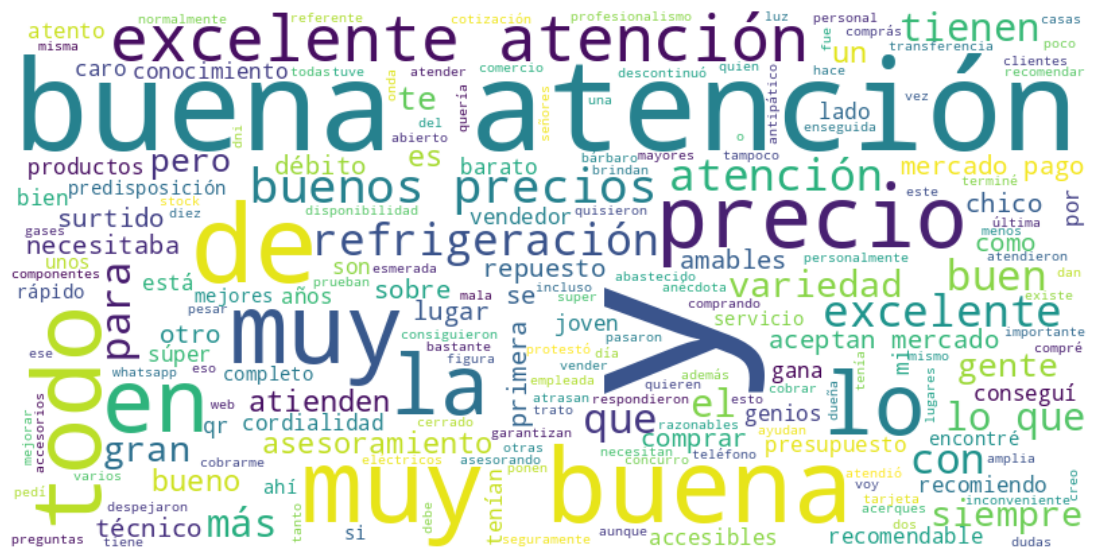

In [104]:
# Instalo librería WordCloud
!pip install wordcloud --quiet

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Creo un texto uniendo todos los tokens
texto_completo = " ".join(todos_tokens)

# Genero WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)

# Muestro WordCloud
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Para un mejor impacto visual, filtro aquellas palabras que no agregan valor al storytelling. En el caso de la palabra "No", si bien puede resultar negativa, en las opiniones no se veia relacionada a un aspecto negativo o de trascendencia, igualmente lo evaluaré con precisión en los ngrams

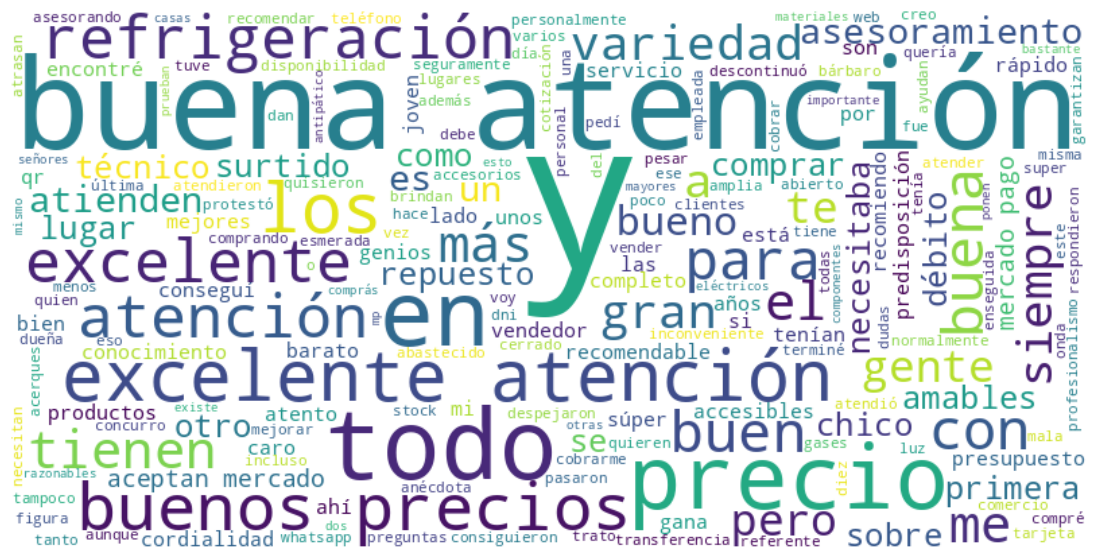

In [105]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Lista de palabras a filtrar (stopwords)
mis_stopwords = {"lo", "la", "muy", "de", "que","no"}

# Creo texto uniendo todos los tokens
texto_completo = " ".join(todos_tokens)

# Genero WordCloud ignorando las stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=mis_stopwords
).generate(texto_completo)

# Muestro WordCloud
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#Análisis de sentimiento


In [106]:
# Listas de palabras positivas y negativas
positivas = ["excelente", "buena", "buenos", "amable", "recomendable", "genios", "agradable", "perfecto"]
negativas = ["mala", "caro", "cerrado", "poca", "sucio", "no", "protestar"]

# Función para clasificar sentimiento
def clasificar_sentimiento(texto):
    tokens = texto.split()
    score = 0
    for palabra in tokens:
        if palabra in positivas:
            score += 1
        elif palabra in negativas:
            score -= 1
    if score > 0:
        return "Positiva"
    elif score < 0:
        return "Negativa"
    else:
        return "Neutral"

# Aplico clasificación
df["sentimiento"] = df["opinion_limpia"].apply(clasificar_sentimiento)

# Muestro  un resumen
print(df["sentimiento"].value_counts())
df.head()


sentimiento
Positiva    58
Neutral     22
Negativa    10
Name: count, dtype: int64


,opinion,opinion_limpia,tokens,long_oracion,sentimiento
0,"""Excelente atención, muy atentos con los clien...",excelente atención muy atentos con los cliente...,"[excelente, atención, muy, atentos, con, los, ...",19,Positiva
1,"""Muy bueno, tienen de todo y los precios son b...",muy bueno tienen de todo y los precios son bue...,"[muy, bueno, tienen, de, todo, y, los, precios...",29,Positiva
2,"""Excelente la atención y el asesoramiento tant...",excelente la atención y el asesoramiento tanto...,"[excelente, la, atención, y, el, asesoramiento...",21,Positiva
3,"""Excelente atención y precios.""",excelente atención y precios,"[excelente, atención, y, precios]",7,Positiva
4,"""Muy buena atención, me consiguieron un repues...",muy buena atención me consiguieron un repuesto...,"[muy, buena, atención, me, consiguieron, un, r...",16,Positiva


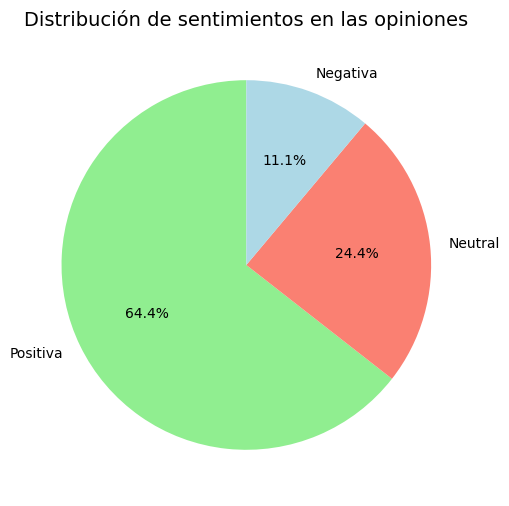

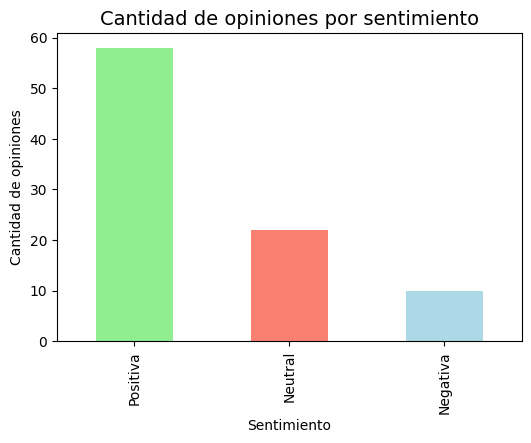

In [107]:
import matplotlib.pyplot as plt

# Conteo de sentimientos
conteo_sentimientos = df["sentimiento"].value_counts()

# Gráfico circular
plt.figure(figsize=(6,6))
conteo_sentimientos.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=["lightgreen","salmon","lightblue"])
plt.title("Distribución de sentimientos en las opiniones", fontsize=14)
plt.ylabel("")
plt.show()

# Gráfico de barras
plt.figure(figsize=(6,4))
conteo_sentimientos.plot(kind='bar', color=["lightgreen","salmon","lightblue"])
plt.title("Cantidad de opiniones por sentimiento", fontsize=14)
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad de opiniones")
plt.show()


In [108]:
from collections import Counter
from nltk import ngrams

# Función para extraer n-grams
def obtener_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Uno todos los tokens en una lista
tokens_total = [token for sublist in df['tokens'] for token in sublist]

# Bigramas (2 palabras)
bigramas = obtener_ngrams(tokens_total, 2)
contador_bigramas = Counter(bigramas)

# Trigramas (3 palabras)
trigramas = obtener_ngrams(tokens_total, 3)
contador_trigramas = Counter(trigramas)

print("Bigramas más comunes:")
print(contador_bigramas.most_common(10))

print("\nTrigramas más comunes:")
print(contador_trigramas.most_common(10))


Bigramas más comunes:
[(('buena', 'atención'), 30), (('muy', 'buena'), 19), (('excelente', 'atención'), 12), (('atención', 'y'), 12), (('buenos', 'precios'), 11), (('lo', 'que'), 7), (('atención', 'muy'), 6), (('muy', 'buenos'), 6), (('atención', 'excelente'), 6), (('y', 'los'), 4)]

Trigramas más comunes:
[(('muy', 'buena', 'atención'), 15), (('buena', 'atención', 'y'), 8), (('excelente', 'atención', 'muy'), 5), (('muy', 'buenos', 'precios'), 5), (('y', 'los', 'precios'), 3), (('precios', 'muy', 'buena'), 3), (('lo', 'que', 'necesitaba'), 3), (('no', 'aceptan', 'mercado'), 3), (('aceptan', 'mercado', 'pago'), 3), (('y', 'buena', 'atención'), 3)]


              precision    recall  f1-score   support

     Neutral       1.00      0.40      0.57         5
    Positiva       0.81      1.00      0.90        13

    accuracy                           0.83        18
   macro avg       0.91      0.70      0.73        18
weighted avg       0.86      0.83      0.81        18



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


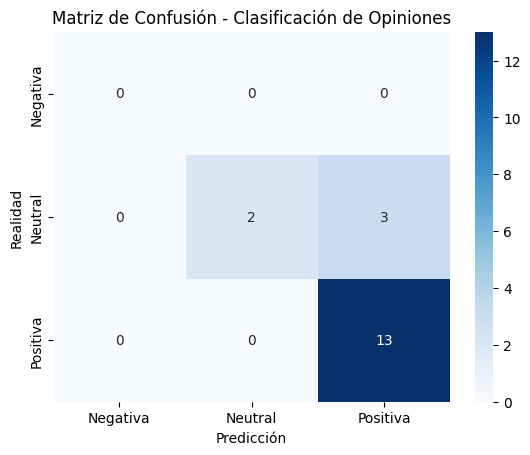

In [109]:
#feature selection + modelo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



# Creo columna de sentimiento
positivas = ["excelente", "buena", "buenos", "amable", "recomendable", "genios", "agradable", "perfecto"]
negativas = ["mala", "caro", "cerrado", "poca", "sucio", "protestar"]

def clasificar_sentimiento(texto):
    tokens = texto.split()
    score = 0
    for palabra in tokens:
        if palabra in positivas:
            score += 1
        elif palabra in negativas:
            score -= 1
    if score > 0:
        return "Positiva"
    elif score < 0:
        return "Negativa"
    else:
        return "Neutral"

df["sentimiento"] = df["opinion_limpia"].apply(clasificar_sentimiento)

# Variables X e y
X_texto = df["opinion_limpia"]
y = df["sentimiento"]

# Stopwords en español
nltk.download("stopwords")
stop_words_spanish = stopwords.words("spanish")

# TF-IDF (Feature Selection)
vectorizador = TfidfVectorizer(max_features=500, stop_words=stop_words_spanish)
X = vectorizador.fit_transform(X_texto)

# División en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modelo supervisado-Logisitic regression
modelo = LogisticRegression(max_iter=200)
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluación
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=modelo.classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=modelo.classes_, yticklabels=modelo.classes_)
plt.title("Matriz de Confusión - Clasificación de Opiniones")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.show()



In [110]:
# Planteo un bloque para probar nuevas frases
def predecir_sentimiento(frase):
    # Limpio y vectorizo igual que el entrenamiento
    frase_vectorizada = vectorizador.transform([frase])
    # Predicción usando el modelo entrenado
    prediccion = modelo.predict(frase_vectorizada)[0]
    return prediccion

# Ejemplo a probar
nueva_frase = input("Frase de prueba para clasificar su sentimiento: ")
resultado = predecir_sentimiento(nueva_frase)
print(f"El sentimiento de la frase es: {resultado}")


Frase de prueba para clasificar su sentimiento: la atencion no fue muy buena
El sentimiento de la frase es: Positiva


El modelo de clasificación de opiniones muestra un buen desempeño en general, con una precisión del 83%, destacando especialmente en la detección de opiniones positivas. Sin embargo, presenta desvíos con la clase "Neutral", con un recall de solo 40%, lo que indica que muchas opiniones neutrales y negativas pueden clasificarse incorrectamente como positivas. Esto podría generar un sesgo en mi analisis. Además, en el bloque de prueba la mayoria de las frases nueva las interpreta positivas, lo cual refuerza los resultados.

Para mejorar el desempeño, podría continuar el analisis equilibrando el conjunto de datos aumentando ejemplos neutrales y negativos y utilizar otros modelos como SVM o Random Forest para ver los resultados.

#Conclusión

El análisis de las opiniones extraídas de Google permitió extraer información valiosa sobre la experiencia y satisfacción de los clientes.

Los análisis exploratorios iniciales (longitud de oraciones, frecuencia de palabras, n-grams y POS tagging) permitieron entender la estructura y el énfasis del lenguaje utilizado por los clientes.

Las visualizaciones (nubes de palabras, distribuciones de frecuencias y gráficos de entrenamiento de modelos) facilitaron la interpretación de patrones de manera clara e intuitiva.

Se identificaron los tópicos más mencionados, principalmente relacionados con la atención del personal, la calidad del servicio y los precios.

A través del análisis de sentimiento, se comprobó que la mayoría de los comentarios tienen una carga positiva, destacando la buena atención y la satisfacción general.

Respecto de los comentarios negativos, se detectaron áreas de mejora asociadas a la puntualidad en la atención, la variedad de medios de pago y algunos aspectos de organización interna.De este modo, las principales oportunidades de mejora se centran en:

Formas de pago: algunos clientes reportaron limitaciones o dificultades para pagar con ciertos medios, lo cual genera frustración.

Atención puntual: se evidencian quejas vinculadas a demoras y tiempos de espera más prolongados de lo esperado.

Comunicación: en algunos casos se señalaron problemas de información poco clara o falta de respuesta rápida a consultas.







#Deep Learning - Redes neuronales


# Clasificación de Fallas en Piezas o Maquinaria

# Resumen del Proyecto

El proyecto consiste en desarrollar un modelo de Red Neuronal Convolucional (CNN) para la detección automática de fallas en piezas de acero laminado en caliente mediante imágenes. Se trabajó sobre un dataset de imágenes que representan diferentes tipos de defectos: Crazing, Inclusion y Patches. El análisis incluye la descarga, organización y preprocesamiento de los datos, el entrenamiento de la CNN, y la evaluación de su capacidad de generalización para clasificar correctamente nuevas imágenes.

#Objetivo del Análisis

El objetivo principal del análisis es automatizar la identificación de fallas en superficies de piezas de acero laminado en caliente, reduciendo el tiempo y la dependencia de inspecciones manuales. Esto se logra entrenando una CNN capaz de reconocer patrones visuales específicos de cada tipo de defecto, generando predicciones precisas y confiables a partir de imágenes nuevas.

#Usuario Final

El usuario final de este proyecto son ingenieros de control de calidad, técnicos de inspección y personal de producción en industrias metalúrgicas. Estas personas podrán utilizar la herramienta para realizar inspecciones rápidas, obtener reportes automáticos y tomar decisiones basadas en información confiable sobre el estado de las piezas de acero.

#Alcance

El proyecto se enfoca en la clasificación de fallas visuales en superficies de piezas de acero laminado en caliente a partir de imágenes estáticas. No aborda fallas internas o datos de sensores, sino exclusivamente la identificación de defectos visibles en las superficies. El modelo está limitado a las clases presentes en el dataset (Crazing, Inclusion, Patches) y puede ampliarse en el futuro con nuevos tipos de defectos.

#Impacto

La implementación de este sistema permite mejorar la eficiencia y precisión en los procesos de inspección de calidad del acero laminado en caliente, reduciendo errores humanos y tiempos de revisión. Además, facilita la detección temprana de defectos, lo que puede prevenir pérdidas económicas, optimizar el mantenimiento y aumentar la confiabilidad de las piezas producidas.



#Definición del problema
El objetivo es implementar un modelo de red neuronal profunda para predecir fallas basadas en defectos superficiales en piezas de acero laminados en caliente, utilizando imágenes para el análisis. Este tipo de análisis es bueno para la implementación de mantenimiento predictivo en entornos industriales.

--2025-08-28 06:02:09--  https://github.com/leoferre-web/Data-Scientist-III/raw/main/fallas.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/leoferre-web/Data-Scientist-III/main/fallas.zip [following]
--2025-08-28 06:02:09--  https://raw.githubusercontent.com/leoferre-web/Data-Scientist-III/main/fallas.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13564280 (13M) [application/zip]
Saving to: ‘fallas.zip’

fallas.zip          100%[===================>]  12.94M  --.-KB/s    in 0.1s    

2025-08-28 06:02:09 (120 MB/s) - ‘fallas.zip’ saved [13564280/13564280]

Archivos extraídos: ['Crazing',

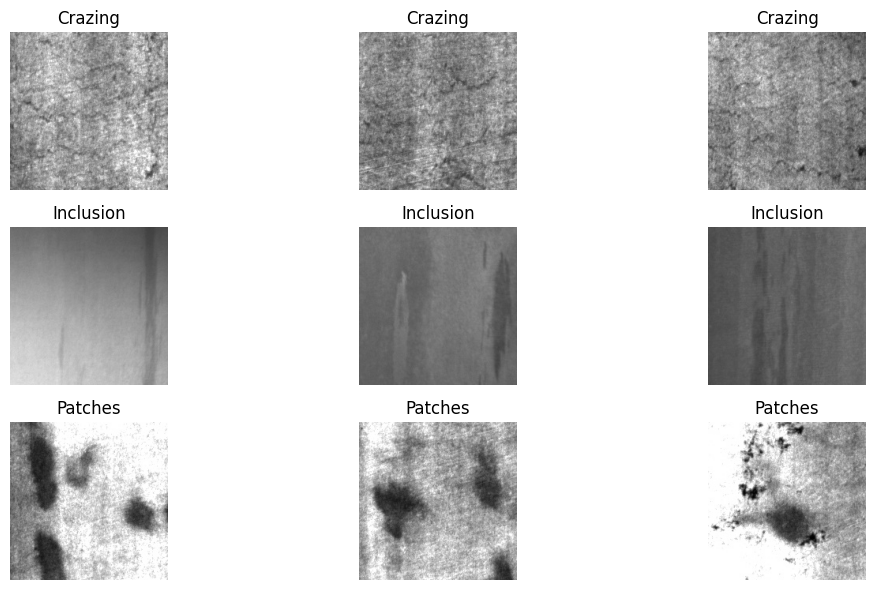

In [111]:
# Objetivo:
# Entrenar una CNN para clasificar imágenes de fallas en maquinaria. Clases: Crazing, Inclusion, Patches

# Descargo el ZIP desde mi repositorio público en GitHub

zip_url = "https://github.com/leoferre-web/Data-Scientist-III/raw/main/fallas.zip"
!wget -O "fallas.zip" "{zip_url}"


#  Descomprimo el ZIP

import zipfile, os, shutil

extract_dir = "Fallas_Maquinaria"
with zipfile.ZipFile("fallas.zip", 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Archivos extraídos:", os.listdir(extract_dir))


#Limpio y organizo el dataset, ya que se encuentran en carpetas en otras carpetas

class_names = ['Crazing', 'Inclusion', 'Patches']

# Muevo imágenes válidas a la carpeta correcta
for class_name in class_names:
    class_dir = os.path.join(extract_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)
    for root, dirs, files in os.walk(extract_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                src = os.path.join(root, file)
                if root != class_dir:
                    if class_name.lower() in file.lower():
                        dst = os.path.join(class_dir, file)
                        shutil.move(src, dst)

# Elimino carpetas sobrantes o vacías
for root, dirs, files in os.walk(extract_dir):
    for d in dirs:
        dir_path = os.path.join(root, d)
        if d not in class_names and os.path.isdir(dir_path):
            shutil.rmtree(dir_path)
        elif os.path.isdir(dir_path) and len(os.listdir(dir_path)) == 0:
            os.rmdir(dir_path)

# Verifico cantidad de imágenes por clase
print("Verificación final de imágenes por clase:")
for class_name in class_names:
    class_dir = os.path.join(extract_dir, class_name)
    print(f"{class_name}: {len(os.listdir(class_dir))} imágenes")

# Visualizo algunas imágenes de ejemplo, y verifico que este todo bien

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

plt.figure(figsize=(12, 6))
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(extract_dir, class_name)
    sample_images = random.sample(os.listdir(class_dir), min(3, len(os.listdir(class_dir))))
    for j, img_file in enumerate(sample_images):
        img_path = os.path.join(class_dir, img_file)
        img = mpimg.imread(img_path)
        plt.subplot(len(class_names), 3, i*3 + j + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
plt.tight_layout()
plt.show()








In [112]:
#  Preparo dataset con ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    extract_dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    extract_dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

print("Clases detectadas en el generador:", train_generator.class_indices)


Found 630 images belonging to 3 classes.
Found 157 images belonging to 3 classes.
Clases detectadas en el generador: {'Crazing': 0, 'Inclusion': 1, 'Patches': 2}


In [113]:

# Construyo CNN

from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()





/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,587 (2.61 MB)

 Trainable params: 683,587 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [114]:

# Entreno CNN

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 258ms/step - accuracy: 0.3546 - loss: 1.0582 - val_accuracy: 0.7643 - val_loss: 0.7491
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 222ms/step - accuracy: 0.7822 - loss: 0.6262 - val_accuracy: 0.7643 - val_loss: 0.3448
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 269ms/step - accuracy: 0.8382 - loss: 0.2938 - val_accuracy: 0.9490 - val_loss: 0.1750
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 202ms/step - accuracy: 0.9567 - loss: 0.1253 - val_accuracy: 0.9809 - val_loss: 0.0726
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 255ms/step - accuracy: 0.9665 - loss: 0.0777 - val_accuracy: 0.9873 - val_loss: 0.0421
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 419ms/step - accuracy: 0.9819 - loss: 0.0434 - val_accuracy: 0.9936 - val_loss: 0.0290
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 424ms/step - accuracy: 0.9938 - loss: 0.0295 - val_accuracy: 0.9936 - val_loss: 0.0186
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 402ms/step - accuracy: 0.9908 - loss: 0.0243 - val_accuracy: 0.9936 - va

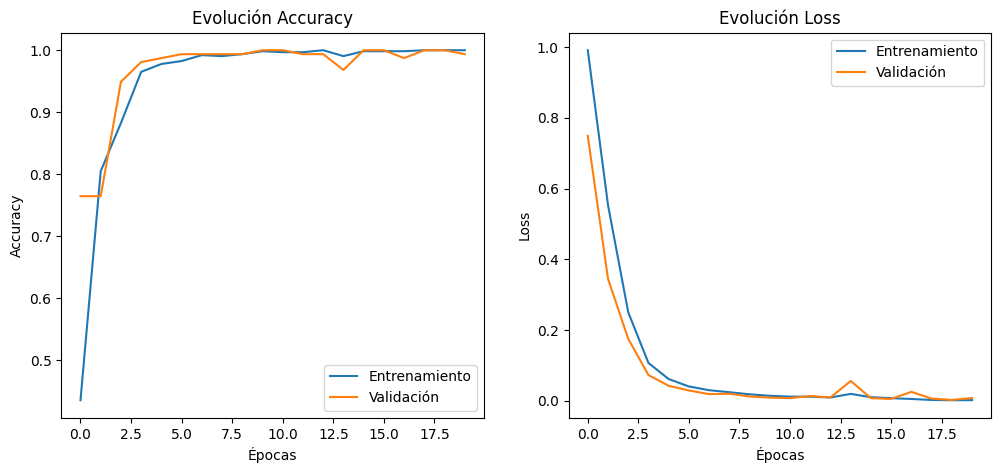

In [115]:

#  Visualización - Accuracy y Loss

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Evolución Accuracy')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Evolución Loss')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()


El modelo alcanzó una exactitud superior al 97% en datos de validación, con curvas de loss y accuracy consistentes entre entrenamiento y validación.La  pérdida (loss) es significativamente baja y estable tanto en el conjunto de entrenamiento como en el de validación a lo largo de las épocas. Esto indica que el modelo aprendió correctamente sin evidencias de sobreajuste, mostrando una buena capacidad de generalización.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


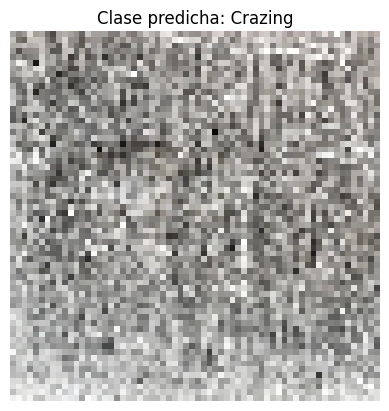

Probabilidades por clase: {'Crazing': np.float32(0.98645884), 'Inclusion': np.float32(1.501659e-30), 'Patches': np.float32(0.013541152)}


In [116]:

# Bloque para probar nuevas imágenes individuales

import numpy as np
from tensorflow.keras.preprocessing import image

nueva_imagen_path = "prueba.jpg"

img = image.load_img(nueva_imagen_path, target_size=(64,64))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediccion = model.predict(img_array)
clase_predicha = class_names[np.argmax(prediccion)]

plt.imshow(img)
plt.title(f'Clase predicha: {clase_predicha}')
plt.axis('off')
plt.show()

print(f"Probabilidades por clase: {dict(zip(class_names, prediccion[0]))}")

#Conclusiones

El proyecto demuestra que las CNN son herramientas efectivas para la clasificación automática de fallas en superficies de piezas de acero laminado en caliente. El modelo entrenado alcanzó una buena capacidad de generalización, permitiendo identificar correctamente los defectos presentes en el dataset. Esto evidencia que la visión por computadora puede integrarse en procesos industriales para optimizar la inspección y el control de calidad de manera confiable.